# Case Study Breast Cancer
We will create a tutorial for the Nearest Neighbor algorithm, including k-Nearest Neighbors (KNN) and Radius Neighbors (RNN), using the Breast Cancer dataset. We will demonstrate how the choices of k and radius affect the classification results and compare the performance of different models. To aid understanding, we will visualize the prediction results.

## Setup
Import necessary libraries and load the Breast Cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

C:\Users\jpini\AppData\Local\Temp\ipykernel_18036\2046211817.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [26]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

## Split the dataset into training and testing sets.

In [2]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the k-Nearest Neighbors (KNN) model.

In [6]:
len(X_test)

114

In [15]:
# Create a list of k values for KNN
k_values = np.arange(1, 60, 1)

# Train KNN models with different k values and store the results
knn_results = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_results[k] = {
        'model': knn_model,
        'y_pred': y_pred_knn,
        'accuracy': accuracy_score(y_test, y_pred_knn)
    }


In [16]:
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

## Create and train the Radius Neighbors (RNN) model.

In [17]:
# Create a list of radius values for RNN
radius_values = np.arange(350, 450, 1)

# Train RNN models with different radius values and store the results
rnn_results = {}
for radius in radius_values:
    rnn_model = RadiusNeighborsClassifier(radius=radius)
    rnn_model.fit(X_train, y_train)
    y_pred_rnn = rnn_model.predict(X_test)
    rnn_results[radius] = {
        'model': rnn_model,
        'y_pred': y_pred_rnn,
        'accuracy': accuracy_score(y_test, y_pred_rnn)
    }

## Compare the performance of KNN and RNN models.

In [18]:
# Print the accuracy of KNN models
print("KNN Accuracy:")
for k, result in knn_results.items():
    print(f"K = {k}: {result['accuracy']:.2f}")

# Print the accuracy of RNN models
print("\nRNN Accuracy:")
for radius, result in rnn_results.items():
    print(f"Radius = {radius}: {result['accuracy']:.2f}")


KNN Accuracy:
K = 1: 0.93
K = 2: 0.93
K = 3: 0.93
K = 4: 0.94
K = 5: 0.96
K = 6: 0.96
K = 7: 0.96
K = 8: 0.96
K = 9: 0.96
K = 10: 0.97
K = 11: 0.98
K = 12: 0.98
K = 13: 0.97
K = 14: 0.97
K = 15: 0.96
K = 16: 0.96
K = 17: 0.96
K = 18: 0.96
K = 19: 0.96
K = 20: 0.96
K = 21: 0.96
K = 22: 0.96
K = 23: 0.96
K = 24: 0.96
K = 25: 0.95
K = 26: 0.95
K = 27: 0.95
K = 28: 0.95
K = 29: 0.95
K = 30: 0.95
K = 31: 0.95
K = 32: 0.95
K = 33: 0.95
K = 34: 0.95
K = 35: 0.95
K = 36: 0.95
K = 37: 0.95
K = 38: 0.95
K = 39: 0.95
K = 40: 0.95
K = 41: 0.95
K = 42: 0.95
K = 43: 0.95
K = 44: 0.95
K = 45: 0.95
K = 46: 0.95
K = 47: 0.95
K = 48: 0.95
K = 49: 0.95
K = 50: 0.95
K = 51: 0.95
K = 52: 0.95
K = 53: 0.95
K = 54: 0.95
K = 55: 0.95
K = 56: 0.95
K = 57: 0.95
K = 58: 0.95
K = 59: 0.95

RNN Accuracy:
Radius = 350: 0.94
Radius = 351: 0.94
Radius = 352: 0.94
Radius = 353: 0.94
Radius = 354: 0.94
Radius = 355: 0.94
Radius = 356: 0.94
Radius = 357: 0.94
Radius = 358: 0.94
Radius = 359: 0.94
Radius = 360: 0.94
Radi

## Visualize the prediction results for KNN and RNN.

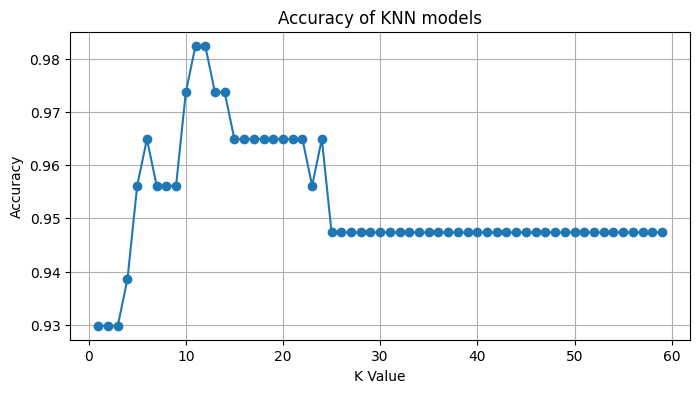

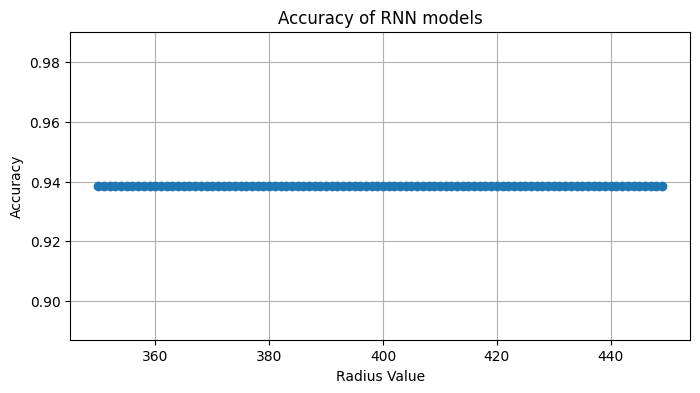

In [19]:
# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuracies = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.grid(True)
plt.show()

# Visualize the accuracy of RNN models
radius_values = [radius for radius in rnn_results.keys()]
radius_accuracies = [result['accuracy'] for result in rnn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(radius_values, radius_accuracies, marker='o')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of RNN models')
plt.grid(True)
plt.show()


## K and R
Feel free to experiment with different values of k and radius to observe how they affect the accuracy of the models.